[[5.88235294e-02 1.00000000e-04 9.41076471e-01]
 [5.88673975e-02 1.00004016e-04 9.41032598e-01]
 [5.89112431e-02 1.00027030e-04 9.40988730e-01]
 ...
 [5.39734800e-02 2.16000619e-04 9.45810519e-01]
 [5.40101547e-02 2.14589230e-04 9.45775256e-01]
 [5.40468888e-02 2.13223195e-04 9.45739888e-01]]


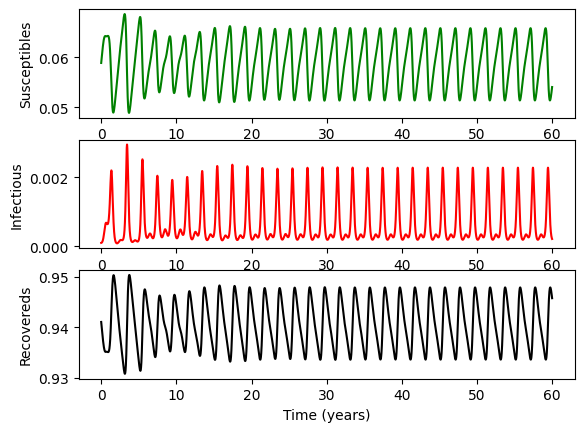

In [1]:
#!/usr/bin/env python

####################################################################
###    This is the PYTHON version of program 5.1 from page 160 of  #
### "Modeling Infectious Disease in humans and animals"            #
### by Keeling & Rohani.										   #
###																   #
### It is the simple SIR epidemic with sinusoidal forcing of the   #
### transmission rate.											   #
### Note: setting beta1 too high can cause numerical difficulties. #
####################################################################

###################################
### Written by Ilias Soumpasis    #
### ilias.soumpasis@ucd.ie (work) #
### ilias.soumpasis@gmail.com	  #
###################################

import scipy.integrate as spi
import numpy as np
import pylab as pl

beta0=17/13.0;
beta1=([0.1]);
gamma=1/13.0;
mu=1/(50*365.0);
S0=1/17.0;
I0=1e-4;
ND=MaxTime=60*365.0;
TS=1.0


### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
#(beta0,beta1,gamma,mu,S0,I0,ND)=(17/13.,np.arange(0.001,0.251,0.001),1/13.,1./(50*365),1/17.,1e-4,20*365)

INPUT=np.array((S0,I0, 1-S0-I0))

def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	beta=beta0*(1+beta1*np.sin(2*np.pi*t/365))
	Y[0] = mu - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

if len(beta1)==1:
	beta1=beta1[0]
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = spi.odeint(diff_eqs,INPUT,t_range)

	print(RES)
	
	t=(np.arange(ND)/365.)
	#Ploting
	pl.subplot(311)
	pl.plot(t,RES[1:,0], 'g', label='S')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Susceptibles')
	pl.subplot(312)
	pl.plot(t,RES[1:,1], 'r', label='I')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Infectious')
	pl.subplot(313)
	pl.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	pl.xlabel ('Time (years)')
	pl.ylabel ('Recovereds')

else:
	pl.ion()
	if ND < 3650:
		ND = 3650
	beta2=beta1
	Bifur_I=np.zeros((len(beta2),10))
	for i in range(len(beta2)):
		beta1 = beta2[i]

		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = spi.odeint(diff_eqs,INPUT,t_range)
		INPUT=RES[-1]

		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[((ND-j*365.)-1)],1]
			
		### Producing the plot step by step but it is slow
		### Prefer to make a video as shown in spatial models
#		if i > 1:
#			pl.semilogy (beta2, Bifur_I, '.k')
#			pl.xlabel (r'Seasonality, $\beta_1$')
#			pl.ylabel (r'Level of Infection')
	pl.ioff()
	pl.semilogy (beta2, (Bifur_I), '.k')
	### if TeX commands do not work comment comment the next line
	pl.xlabel (r'Seasonality, $\beta_1$')
	pl.ylabel (r'Level of Infection')
	### if TeX commands do not work comment uncomment the next line
#	pl.xlabel ('Seasonality, beta1')
#	pl.ylabel ('Level of Infection (log_10)')
pl.show()